In [1]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"poems.csv")
data_df = pd.read_csv(data_path)

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df.dropna(subset=['内容'], inplace=True)

# 词向量训练

In [25]:
text2 = "\n".join([" ".join(poem) for poem in data_df["内容"].values])
train_path = os.path.join(data_dir, "train.txt")
with open(train_path, "w", encoding="utf-8") as f:
    f.write(text2)#每行一首诗，使用空格分隔开每个字

In [26]:
from gensim.models import word2vec
def train(file_path,dynasty="全部"):
    # 加载语料
    sentences = word2vec.Text8Corpus(file_path)
    # 训练模型
    print(file_path)
    model = word2vec.Word2Vec(sentences)
    # 保存模型
    model_name = os.path.basename(file_path).split(".")[0]
    model.save('{}/{}.model'.format(data_dir,model_name))
    # 选出最相似的10个词
    for e in model.most_similar(positive=['春'], topn=10):
        print(e[0], e[1])
    return model

In [27]:
train(train_path)

./data\train.txt


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':


秋 0.5571610927581787
花 0.5310259461402893
酴 0.5048748254776001
晴 0.5018565654754639
梅 0.4905290901660919
暄 0.47397080063819885
浓 0.45484331250190735
芳 0.4447970390319824
冬 0.44370919466018677
迟 0.44356799125671387


In [20]:
model = word2vec.Word2Vec.load('{}/train.model'.format(data_dir))
for word in ["春", '思', "梅", "冬"]:
    res = model.most_similar(positive=[word], topn=10)
    print(word)
    print(res)
    print("-" * 10)

春
[('秋', 0.5638052225112915), ('花', 0.5358913540840149), ('梅', 0.508953332901001), ('晴', 0.49195408821105957), ('酴', 0.4890764355659485), ('迟', 0.4594857692718506), ('芳', 0.4504072666168213), ('浓', 0.44852933287620544), ('楝', 0.44792836904525757), ('暄', 0.44311046600341797)]
----------
思
[('怀', 0.5922459363937378), ('念', 0.4862605929374695), ('逢', 0.4575193226337433), ('懐', 0.44619303941726685), ('情', 0.4445725083351135), ('悽', 0.43136513233184814), ('忆', 0.42946264147758484), ('忖', 0.4274680018424988), ('愁', 0.4255683720111847), ('慰', 0.42452678084373474)]
----------
梅
[('梨', 0.6253432035446167), ('桃', 0.5781787633895874), ('楝', 0.5772002935409546), ('醾', 0.5575424432754517), ('杏', 0.5332050919532776), ('枝', 0.5183610916137695), ('酴', 0.5163489580154419), ('春', 0.5089534521102905), ('花', 0.5020267367362976), ('蓓', 0.49759984016418457)]
----------
冬
[('腊', 0.5422682166099548), ('冱', 0.5394797325134277), ('夏', 0.5353380441665649), ('暄', 0.500957727432251), ('沍', 0.498401015996933), ('霜'

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [1]:
from gensim.models import word2vec
model_path='./data/train.model'
print(model_path)
model = word2vec.Word2Vec.load(model_path)


D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


./data/train.model


In [17]:
model.wv.most_similar("喜",topn=10)

[('贺', 0.5157285332679749),
 ('忭', 0.47273269295692444),
 ('悦', 0.471987247467041),
 ('忻', 0.4704793691635132),
 ('欣', 0.4658914804458618),
 ('幸', 0.46543556451797485),
 ('赏', 0.44436633586883545),
 ('好', 0.4424256384372711),
 ('庆', 0.42807865142822266),
 ('乐', 0.4247027635574341)]

In [21]:
from sklearn.cluster import KMeans

#获取model里面的说有关键词
keys=model.wv.vocab.keys()

#获取词对于的词向量
wordvector=[]
for key in keys:
    wordvector.append(model[key])

#分类
classCount=10
clf = KMeans(n_clusters=classCount)
s = clf.fit(wordvector)
print(s)
#获取到所有词向量所属类别
labels=clf.labels_
keys=list(keys)
#把是一类的放入到一个集合
from collections import defaultdict
classCollects=defaultdict(list)
for i in range(len(keys)):
    classCollects[labels[i]].append(keys[i])

print(classCollects)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
defaultdict(<class 'list'>, {1: ['云', '梳', '分', '除', '虚', '新', '糊', '屏', '风', '蓬', '莱', '摇', '光', '凉', '松', '阴', '回', '廊', '僧', '香', '愁', '青', '华', '邻', '时', '晴', '开', '衣', '幽', '泉', '声', '斜', '阳', '寒', '栖', '楼', '阑', '吹', '灯', '窗', '红', '春', '宫', '花', '纱', '双', '迟', '台', '莺', '啼', '仙', '间', '清', '浓', '歌', '来', '还', '穿', '衫', '钩', '残', '梢', '边', '星', '犹', '篱', '茅', '眠', '扶', '前', '明', '看', '泥', '凰', '袍', '留', '银', '飞', '离', '梧', '桐', '秋', '空', '芳', '头', '堂', '苔', '衔', '深', '门', '芙', '蓉', '帘', '垂', '笼', '尘', '韶', '稠', '凝', '兰', '寻', '鸳', '鸯', '烟', '、', '潇', '琼', '珠', '瑶', '轮', '弹', '琴', '莲', '林', '颜', '酡', '黄', '玲', '珑', '珂', '霞', '浑', '梅', '堪', '罗', '炉', '鸾', '翻', '棋', '槽', '根', '团', '偏', '纨', '襟', '初', '篁', '玕', '情', '成', '微', '吟', '零', '霜', '魂', '装', '池', '移', '园', '雕', '禽', '擎', '衿', '欢', '迷', '郎',

# 词向量可视化

In [2]:
# Step 6: Visualize the embeddings.

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    # 设置图片大小
    plt.figure(figsize=(15, 15))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')# mac：method='exact'
# 画500个点
plot_count = 500
low_dim_embs = tsne.fit_transform(model.wv.vectors[:plot_count])

In [7]:
low_dim_embs[0]

array([4.0647364, 9.016398 ], dtype=float32)

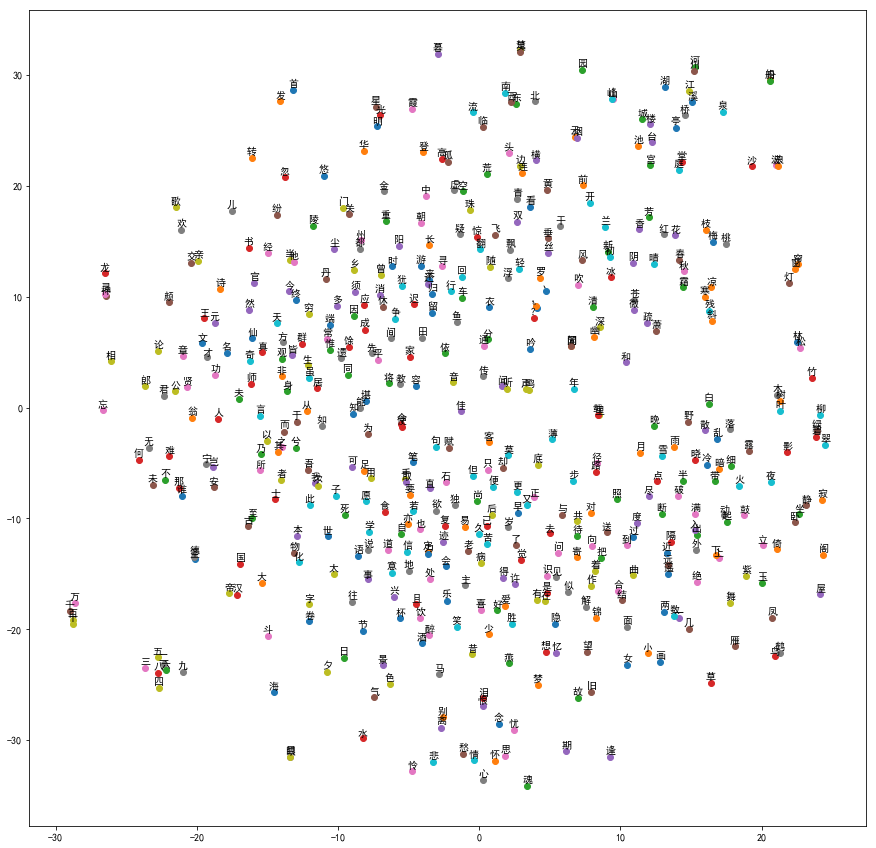

In [8]:
labels = [model.wv.index2word[i] for i in range(plot_count)]
plot_with_labels(low_dim_embs, labels)

# 情感分类

In [ ]:
{"悲":["愁","恸","痛","寡","哀","伤"、"嗟"]
"惧":["谗","谤","患","罪","诈","惧","诬"]
"乐":["悦","欣","乐","怡","洽","畅","愉"]
"怒":"怒","雷","吼","霆","霹","猛","轰"]
"思":["思","忆","怀","恨","吟","逢","期"]
"喜"：["喜","健","倩","贺","好","良","善"]
"忧"：["恤","忧","痾","虑","艰","遑","厄"]}

In [ ]:
from gensim.models import word2vec
# sentiment_model_path='./data/sentiment.model'
sentiment_model_path='./data/sentiment_one_epoch.model'

print(sentiment_model_path)
sentiment_model = word2vec.Word2Vec.load(sentiment_model_path)

In [4]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"train.csv")
train_df = pd.read_csv(data_path)

In [7]:
train_df.dropna(subset=['标签'], inplace=True)

In [20]:
train_df["标签"]

0                            []
1                            []
2                    ['悲', '思']
3                            []
4                    ['思', '思']
5                            []
6                         ['悲']
7                            []
8                            []
9                         ['思']
10                           []
11                        ['悲']
12                           []
13                   ['思', '悲']
14                           []
15                           []
16                        ['思']
17                        ['思']
18                           []
19                           []
20                        ['乐']
21                        ['喜']
22                           []
23                        ['喜']
24                           []
25                        ['乐']
26                   ['喜', '悲']
27                           []
28                   ['喜', '喜']
29                           []
                   ...         
1054962 

In [28]:
dynastys=["先秦", "汉", "魏晋", "隋", "唐", "五代", "宋", "辽", "金", "元", "明", "清", "民国", "近代", "当代","未知"]
from collections import defaultdict,Counter
all=defaultdict(list)
dynastys=["诗经","刘向","曹植","李世民","白居易",
"李煜","陆游","萧观音","李俊民","刘基",
"王世贞","丘逢甲","黄浚","曹家达","卢青山"]
for dynasty in dynastys:
    dynasty_li=[]
    for tags in train_df.loc[train_df['作者'] ==dynasty]["标签"]:
#     for tags in train_df[train_df.loc["朝代"] ==dynasty,["标签"]]["标签"]:
        tags=set(eval(tags))
        dynasty_li.extend(list(tags))
    all[dynasty].append(dict(Counter(dynasty_li)))

In [29]:
all

defaultdict(list,
            {'诗经': [{'思': 85,
               '乐': 42,
               '喜': 59,
               '悲': 46,
               '忧': 51,
               '怒': 16,
               '惧': 12}],
             '刘向': [{'思': 13,
               '悲': 14,
               '怒': 4,
               '惧': 9,
               '忧': 9,
               '喜': 10,
               '乐': 4}],
             '曹植': [{'思': 43,
               '忧': 21,
               '乐': 32,
               '喜': 41,
               '悲': 29,
               '惧': 19,
               '怒': 7}],
             '李世民': [{'思': 41, '乐': 29, '喜': 12, '悲': 11, '忧': 10, '惧': 4}],
             '白居易': [{'思': 2281,
               '忧': 577,
               '喜': 1409,
               '乐': 700,
               '悲': 1191,
               '惧': 127,
               '怒': 90}],
             '李煜': [{'悲': 42, '喜': 5, '思': 46, '忧': 2, '乐': 1}],
             '陆游': [{'思': 3708,
               '惧': 322,
               '乐': 1160,
               '怒': 418,
               '悲': 208